In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
PATH = './mnist_model.pt'
model = torch.load(PATH)

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


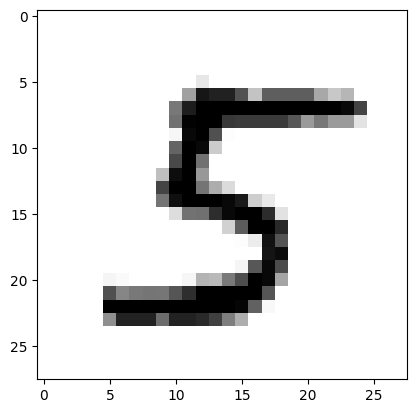

In [4]:
dataiter = iter(trainloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)
plt.imshow(images[2].numpy().squeeze(), cmap='gray_r')

In [59]:
img = images[2].view(1, 784)
with torch.no_grad():
        logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
pred_label = probab.index(max(probab))
pred_label

5

In [54]:
import numpy as np
from PIL import Image

def load_image(filename):
    # load the image
    img = Image.open(filename)
    
    # convert to array
    img = np.array(img)
    
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 784)
    
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [99]:
img = load_image('./42.jpg')
img = torch.from_numpy(img)
with torch.no_grad():
        logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
pred_label = probab.index(max(probab))
pred_label

4